In [30]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.DataFrame.from_csv('./dnc-temporalGraph/out.dnc-temporalGraph', sep = '\t', header = 0, index_col=None)
data = data.drop('weight', 1)
data.head()

,from,to,timestamp
0,419,465,1463507482
1,869,453,1462337903
2,943,1151,1463167636
3,943,217,1463167636
4,943,841,1463167636


In [57]:
n = np.max(data['to'])
A = np.zeros((n,n))
for index, row in data.iterrows():
    A[row['from']-1, row['to']-1] = 1 #+=1

In [58]:
import networkx as nx
G = nx.from_numpy_matrix(A,create_using=nx.DiGraph())
G.is_directed()

True

C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is

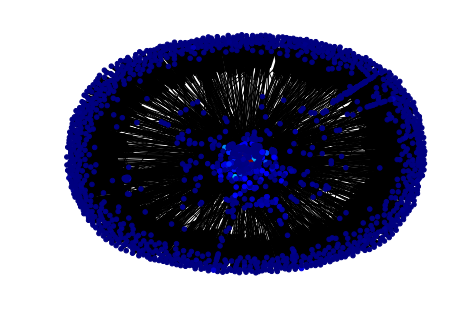

In [43]:
pos = nx.spring_layout(G)
degree = G.degree()
nodes = G.nodes()
n_color = np.asarray([degree[n] for n in nodes])
nx.draw(G, pos, node_color=n_color, node_size=20, cmap=plt.cm.jet)
plt.show()

# 1. Page Rank

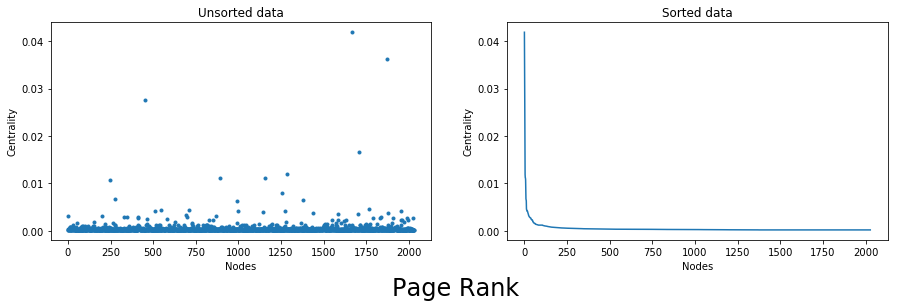

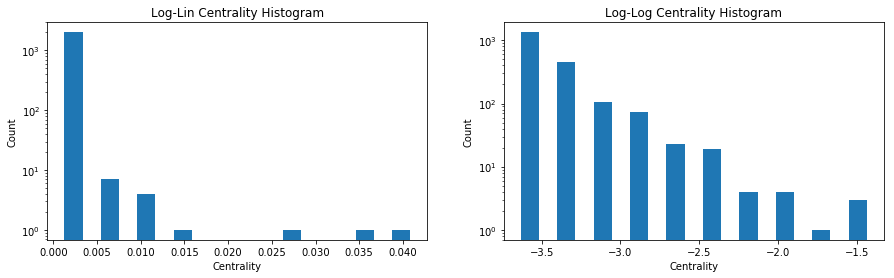

In [151]:
page_rank = nx.pagerank(G)

def plot_dic(dic, name):
    vals = np.array(list(dic.values()))
    plt.figure(figsize=(15,4))
    plt.suptitle(name, fontsize=24,y=0)
    plt.subplot(1,2,1)
    plt.plot(vals, '.')
    plt.title("Unsorted data");plt.ylabel("Centrality");plt.xlabel("Nodes")
    plt.subplot(1,2,2)
    plt.plot(sorted(vals, reverse=True))
    plt.title("Sorted data");plt.ylabel("Centrality");plt.xlabel("Nodes")
    plt.show()
    
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.hist(vals, log=True, rwidth=0.5)
    plt.title("Log-Lin Centrality Histogram");plt.ylabel("Count");plt.xlabel("Centrality")
    plt.subplot(1,2,2)
    pos_vals = vals[vals > 0]
    plt.hist(np.log10(pos_vals), log=True, rwidth=0.5)
    plt.title("Log-Log Centrality Histogram");plt.ylabel("Count");plt.xlabel("Centrality")
    plt.show()

plot_dic(page_rank,'Page Rank')

We observe a linear descent in the log-log histogram, confirming a negative exponential law.

# 2. Katz centrality

In [152]:
katz_cen = nx.katz_centrality_numpy(G)
np.min(list(katz_cen.values()))

-0.21857795456522286

We observe a negative value! We repeat with a value of $\alpha < \lambda_{max}^{-1}$, ie smaller than the reciprocal of the dominant eigenvalue of the adjacency matrix.

In [153]:
from numpy import linalg as nl
eig_vals = nl.eigvals(A)
max_eig_val = np.max(np.abs(eig_vals))
print('dominant eigenvalue', max_eig_val)
a = 1/max_eig_val
print('alpha', a)

katz_cen = nx.katz_centrality_numpy(G,alpha=a)

dominant eigenvalue 26.0080251181
alpha 0.0384496706481


In [154]:
min_cen = np.min(list(katz_cen.values()))
print('minimum centrality', min_cen)
assert min_cen >= 0

minimum centrality 1.39050173182e-16


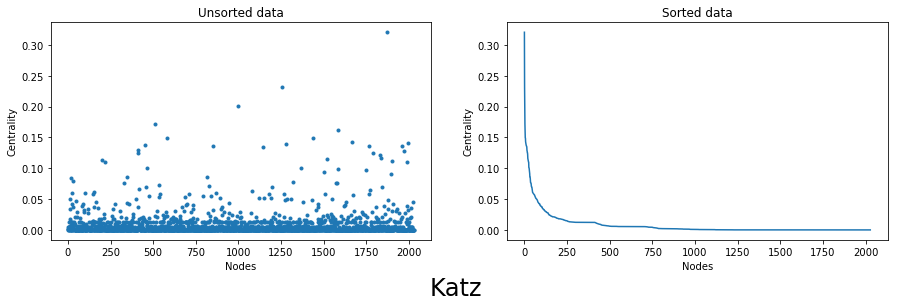

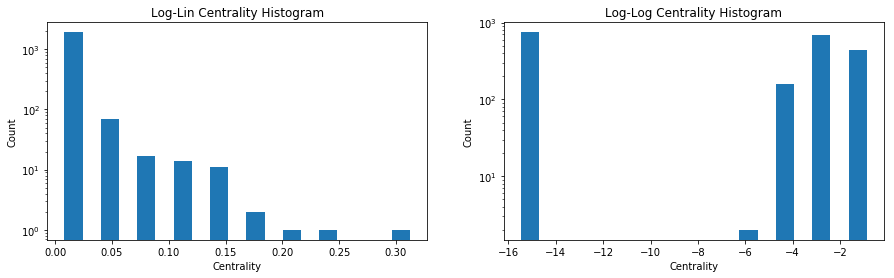

In [155]:
plot_dic(katz_cen,'Katz')

# 3. Clustering

## 3.1 Triangles

Transitivity:  8.9 %


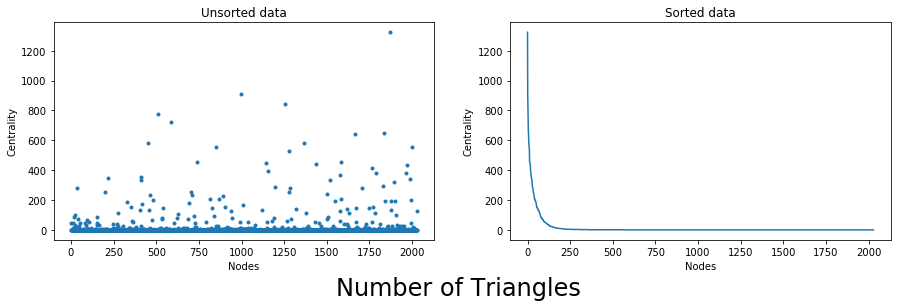

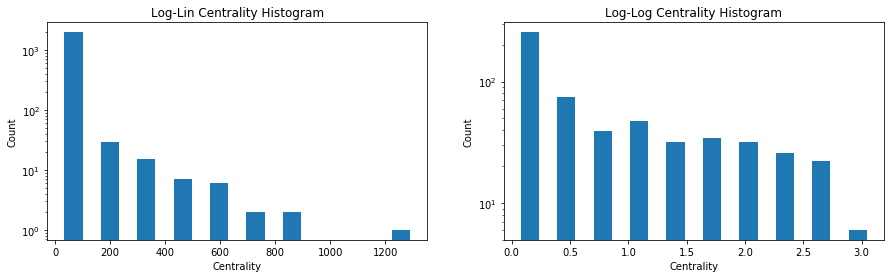

In [159]:
H = G.to_undirected()
triangles = nx.triangles(H)

transitivity = nx.transitivity(H)
print("Transitivity: ", np.round(transitivity*100, 2), "%")

plot_dic(triangles, 'Number of Triangles')

## 3.2 Clustering

Average clustering:  0.19


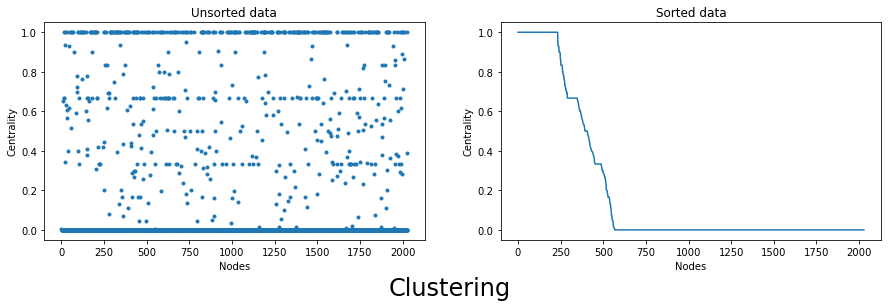

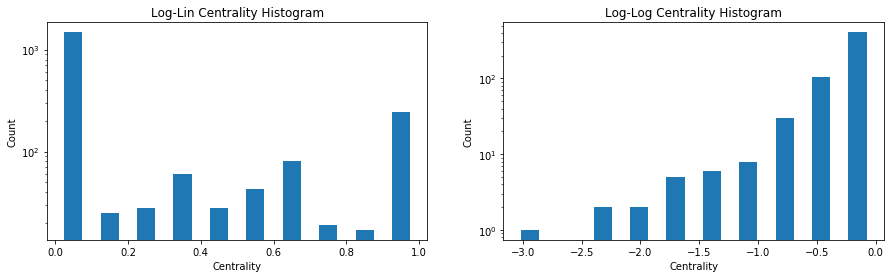

In [160]:
avg_clustering = nx.average_clustering(H)
clustering = nx.clustering(H)
print("Average clustering: ", np.round(avg_clustering,2))

plot_dic(clustering, 'Clustering')

# 4. Distance measures

Connected components: 179

Largest connected component measures: 
Nodes:  1833
Edges:  4421
Center:  [452, 1158]
Diameter:  8
Periphery:  [53, 110, 114, 153, 188, 189, 259, 296, 377, 386, 401, 513, 561, 668, 732, 779, 983, 987, 1004, 1034, 1049, 1052, 1087, 1088, 1173, 1198, 1300, 1325, 1372, 1476, 1696, 1792, 1833, 1871, 1886, 1906, 1972, 1985, 2003]
Radius:  4


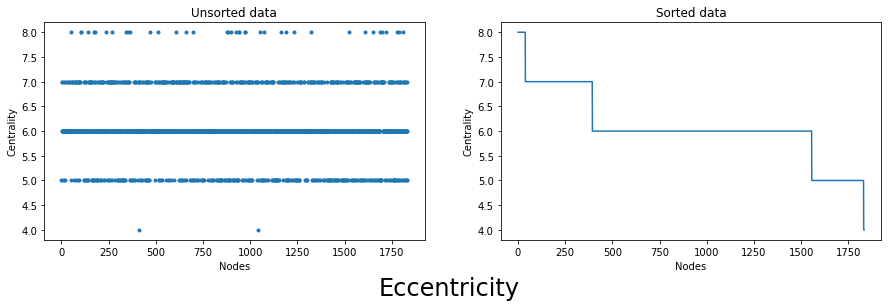

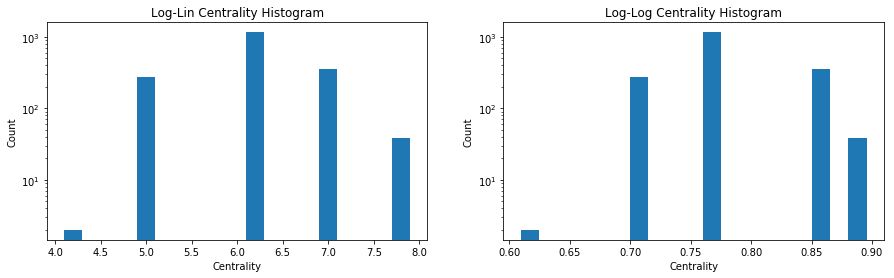

In [161]:
#center = nx.center(G) #unconnected graph
#diameter = nx.diameter(G) #unconnected graph
#eccentricity = nx.eccentricity(G) #unconnected graph
#periphery = nx.periphery(G) #unconnected graph
#radius = nx.radius(G) #unconnected graph
graphs = list(nx.connected_component_subgraphs(H))
print("Connected components:", len(graphs))

#We take the largest connected component to compute the distance measures
H_max = max(nx.connected_component_subgraphs(H), key=len)
print("\nLargest connected component measures: ")
print("Nodes: ", H_max.number_of_nodes())
print("Edges: ", H_max.number_of_edges())

center = nx.center(H_max)
diameter = nx.diameter(H_max)
eccentricity = nx.eccentricity(H_max)
periphery = nx.periphery(H_max)
radius = nx.radius(H_max)
print("Center: ", center)
print("Diameter: ", diameter)
#print("Eccentricity: ", eccentricity)
print("Periphery: ", periphery)
print("Radius: ", radius)

plot_dic(eccentricity, 'Eccentricity')

# 5. Degree distribution

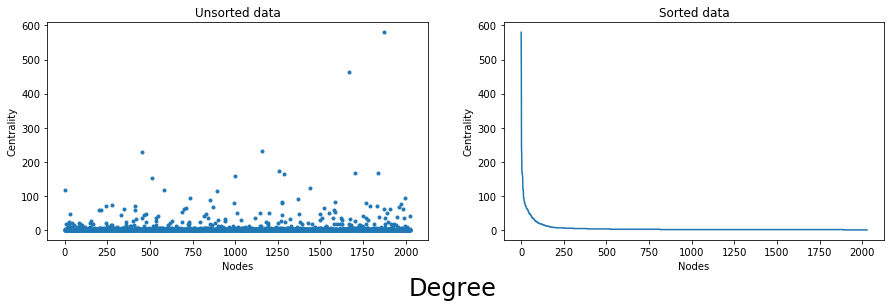

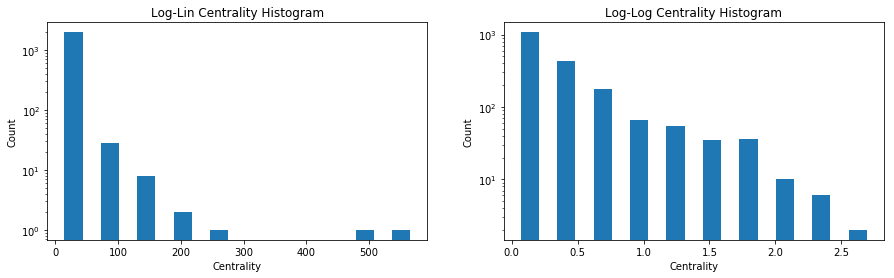

In [163]:
degree = nx.degree(G)
plot_dic(degree,'Degree')